In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

In [3]:
spark = SparkSession.builder.appName("demo").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/04/05 08:24:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
dataset=fetch_california_housing()
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [7]:
print(dataset.feature_names)
print(dataset.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [8]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['Price']=dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
df.shape

(20640, 9)

In [9]:
spark_df=spark.createDataFrame(df)
spark_df.show(5)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+------+--------+------------------+------------------+----------+------------------+--------+---------+-----+
|MedInc|HouseAge|          AveRooms|         AveBedrms|Population|          AveOccup|Latitude|Longitude|Price|
+------+--------+------------------+------------------+----------+------------------+--------+---------+-----+
|8.3252|    41.0| 6.984126984126984|1.0238095238095237|     322.0|2.5555555555555554|   37.88|  -122.23|4.526|
|8.3014|    21.0| 6.238137082601054|0.9718804920913884|    2401.0| 2.109841827768014|   37.86|  -122.22|3.585|
|7.2574|    52.0| 8.288135593220339| 1.073446327683616|     496.0|2.8022598870056497|   37.85|  -122.24|3.521|
|5.6431|    52.0|5.8173515981735155|1.0730593607305936|     558.0| 2.547945205479452|   37.85|  -122.25|3.413|
|3.8462|    52.0| 6.281853281853282|1.0810810810810811|     565.0|2.1814671814671813|   37.85|  -122.25|3.422|
+------+--------+------------------+------------------+----------+------------------+--------+---------+-----+
o

In [10]:
spark_df.printSchema()

root
 |-- MedInc: double (nullable = true)
 |-- HouseAge: double (nullable = true)
 |-- AveRooms: double (nullable = true)
 |-- AveBedrms: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- AveOccup: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Price: double (nullable = true)



In [37]:
spark_df.summary().show()

+-------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+
|summary|            MedInc|          HouseAge|          AveRooms|          AveBedrms|        Population|          AveOccup|          Latitude|          Longitude|             Price|
+-------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+
|  count|             20640|             20640|             20640|              20640|             20640|             20640|             20640|              20640|             20640|
|   mean| 3.870671002906976|28.639486434108527| 5.428999742190375| 1.0966751496062073|1425.4767441860465| 3.070655159436374| 35.63186143410853|-119.56970445736435|2.0685581690891466|
| stddev|1.8998217179452692|12.585557612111653|2.4741731394243183|0.47391085679546596

In [40]:
spark_df.summary().toPandas()

,summary,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,count,20640,20640,20640,20640,20640,20640,20640,20640,20640
1,mean,3.870671002906976,28.639486434108527,5.428999742190375,1.0966751496062073,1425.4767441860465,3.070655159436374,35.63186143410853,-119.56970445736435,2.0685581690891466
2,stddev,1.8998217179452692,12.585557612111653,2.4741731394243183,0.47391085679546596,1132.462121765341,10.386049562213618,2.1359523974571175,2.003531723502588,1.1539561587441387
3,min,0.4999,1.0,0.8461538461538461,0.3333333333333333,3.0,0.6923076923076923,32.54,-124.35,0.14999
4,25%,2.5625,18.0,4.440619621342513,1.0060501296456352,787.0,2.429304029304029,33.93,-121.8,1.196
5,50%,3.5345,29.0,5.2290909090909095,1.048780487804878,1166.0,2.8180494905385736,34.26,-118.5,1.797
6,75%,4.7426,37.0,6.052083333333333,1.099502487562189,1724.0,3.282051282051282,37.71,-118.01,2.647
7,max,15.0001,52.0,141.9090909090909,34.06666666666667,35682.0,1243.3333333333333,41.95,-114.31,5.00001


In [13]:
print((spark_df.count()),(len(spark_df.columns)))

20640 9


In [15]:
from pyspark.sql.functions import col,isnan,when,count
df2 = spark_df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in spark_df.columns])
df2.show()

+------+--------+--------+---------+----------+--------+--------+---------+-----+
|MedInc|HouseAge|AveRooms|AveBedrms|Population|AveOccup|Latitude|Longitude|Price|
+------+--------+--------+---------+----------+--------+--------+---------+-----+
|     0|       0|       0|        0|         0|       0|       0|        0|    0|
+------+--------+--------+---------+----------+--------+--------+---------+-----+



<Axes: >

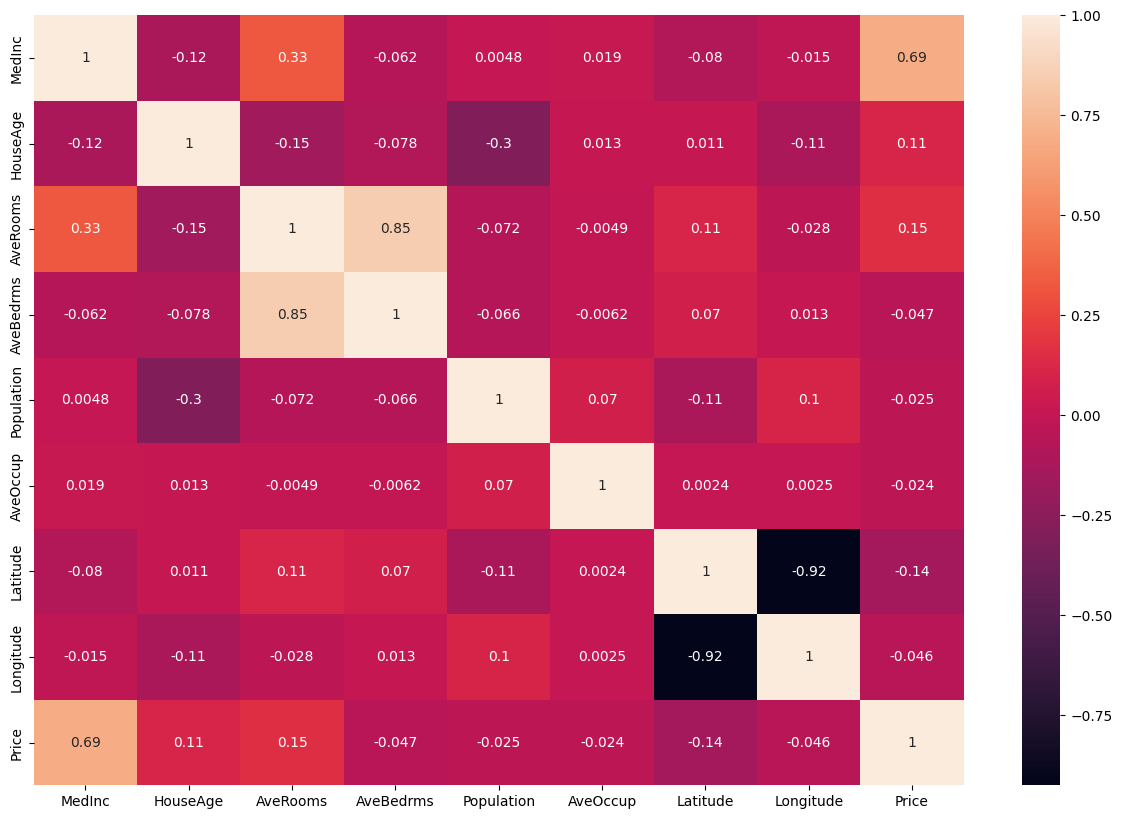

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(spark_df.toPandas().corr(), annot=True)

In [18]:
from pyspark.sql.functions import corr
for col in spark_df.columns:

    print(f"{col} : {spark_df.select(corr(col,'Price')).show()}")

+-------------------+
|corr(MedInc, Price)|
+-------------------+
| 0.6880752079585476|
+-------------------+

MedInc : None
+---------------------+
|corr(HouseAge, Price)|
+---------------------+
|  0.10562341249321008|
+---------------------+

HouseAge : None
+---------------------+
|corr(AveRooms, Price)|
+---------------------+
|  0.15194828974145766|
+---------------------+

AveRooms : None
+----------------------+
|corr(AveBedrms, Price)|
+----------------------+
|  -0.04670051296948719|
+----------------------+

AveBedrms : None
+-----------------------+
|corr(Population, Price)|
+-----------------------+
|    -0.0246496788888949|
+-----------------------+

Population : None
+---------------------+
|corr(AveOccup, Price)|
+---------------------+
| -0.02373741295613435|
+---------------------+

AveOccup : None
+---------------------+
|corr(Latitude, Price)|
+---------------------+
| -0.14416027687465854|
+---------------------+

Latitude : None
+----------------------+
|corr(Long

In [21]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=spark_df.columns, outputCol=vector_col)
spark_df_vector = assembler.transform(spark_df).select(vector_col)

matrix = Correlation.corr(spark_df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)


23/04/05 08:48:56 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/04/05 08:48:56 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


[[1.0, -0.11903398993785674, 0.3268954316412956, -0.062040133836099055, 0.00483434562765292, 0.018766247966968828, -0.07980912745971873, -0.015175865414173956, 0.6880752079585479], [-0.11903398993785674, 1.0, -0.1532774225619893, -0.0777472827537612, -0.2962442397735358, 0.013191356636029737, 0.011172673530605358, -0.1081968131124483, 0.10562341249320996], [0.3268954316412956, -0.1532774225619893, 1.0, 0.847621325713045, -0.0722128486589335, -0.004852294991781333, 0.10638896548625514, -0.027540053873544773, 0.1519482897414578], [-0.062040133836099055, -0.0777472827537612, 0.847621325713045, 1.0, -0.06619740232676066, -0.006181201268673109, 0.06972112988874211, 0.013344389639999118, -0.046700512969486865], [0.00483434562765292, -0.2962442397735358, -0.0722128486589335, -0.06619740232676066, 1.0, 0.06986273036567667, -0.10878474737766756, 0.09977322287464559, -0.024649678888894896], [0.018766247966968828, 0.013191356636029737, -0.004852294991781333, -0.006181201268673109, 0.0698627303656

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [22]:
spark_df_corr = spark.createDataFrame(corrmatrix,spark_df.columns)
spark_df_corr.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|              MedInc|            HouseAge|            AveRooms|           AveBedrms|          Population|            AveOccup|            Latitude|           Longitude|               Price|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|-0.11903398993785674|  0.3268954316412956|-0.06204013383609...| 0.00483434562765292|0.018766247966968828|-0.07980912745971873|-0.01517586541417...|  0.6880752079585479|
|-0.11903398993785674|                 1.0| -0.1532774225619893| -0.0777472827537612| -0.2962442397735358|0.013191356636029737|0.011172673530605358| -0.1081968131124483| 0.10562341249320996|
|  0.3268954316412956| -0.1532774225619893|  

In [24]:
spark_df_corr.show(vertical=True)

-RECORD 0--------------------------
 MedInc     | 1.0                  
 HouseAge   | -0.11903398993785674 
 AveRooms   | 0.3268954316412956   
 AveBedrms  | -0.06204013383609... 
 Population | 0.00483434562765292  
 AveOccup   | 0.018766247966968828 
 Latitude   | -0.07980912745971873 
 Longitude  | -0.01517586541417... 
 Price      | 0.6880752079585479   
-RECORD 1--------------------------
 MedInc     | -0.11903398993785674 
 HouseAge   | 1.0                  
 AveRooms   | -0.1532774225619893  
 AveBedrms  | -0.0777472827537612  
 Population | -0.2962442397735358  
 AveOccup   | 0.013191356636029737 
 Latitude   | 0.011172673530605358 
 Longitude  | -0.1081968131124483  
 Price      | 0.10562341249320996  
-RECORD 2--------------------------
 MedInc     | 0.3268954316412956   
 HouseAge   | -0.1532774225619893  
 AveRooms   | 1.0                  
 AveBedrms  | 0.847621325713045    
 Population | -0.0722128486589335  
 AveOccup   | -0.00485229499178... 
 Latitude   | 0.106388965486

In [23]:
spark_df_corr.toPandas()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
1,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
2,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
3,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
4,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
5,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
6,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
7,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
8,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

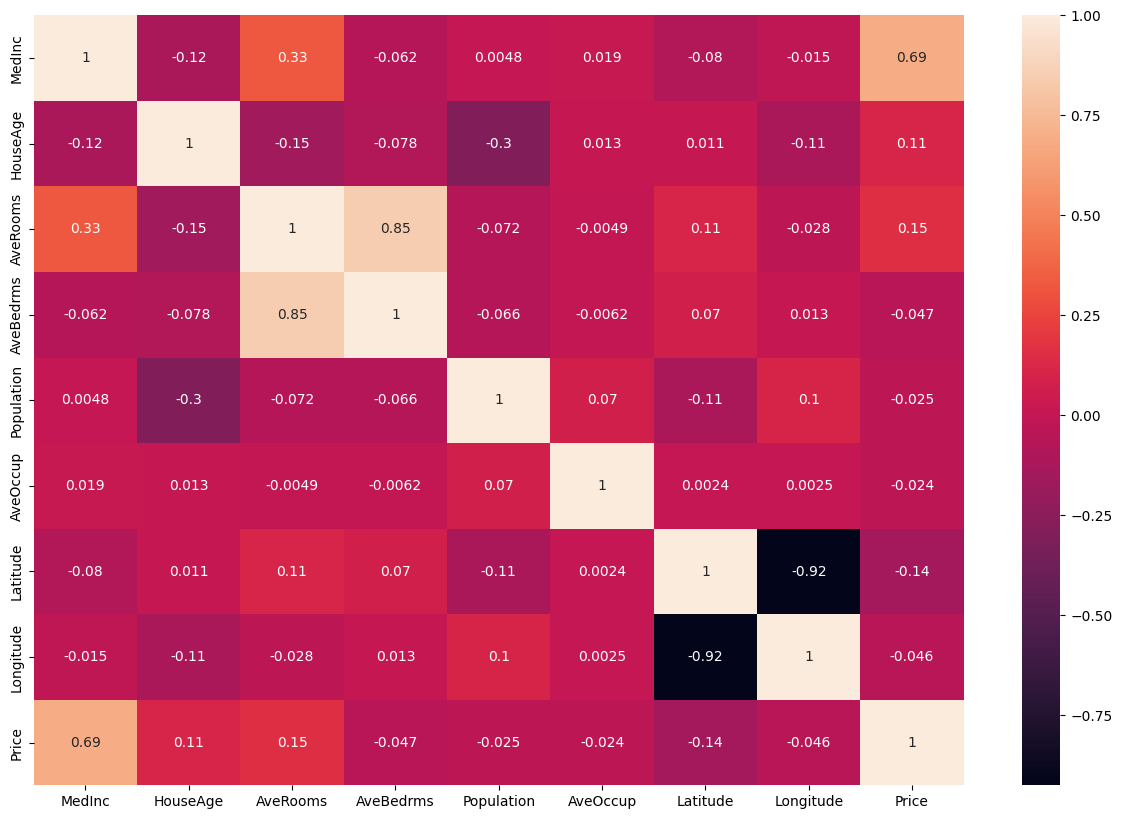

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(corrmatrix, xticklabels=spark_df_corr.columns, \
           yticklabels=spark_df_corr.columns, annot=True)

In [ ]:
features=spark_df.columns

In [29]:
pearsonCorr = Correlation.corr(spark_df, 'pearson').collect()[0][0]
print(str(pearsonCorr).replace('nan', 'NaN'))

spearmanCorr = Correlation.corr(spark_df, 'features', method='spearman').collect()[0][0]
print(str(spearmanCorr).replace('nan', 'NaN'))


AnalysisException: cannot resolve 'pearson' given input columns: [AveBedrms, AveOccup, AveRooms, HouseAge, Latitude, Longitude, MedInc, Population, Price];
'Project ['pearson]
+- LogicalRDD [MedInc#0, HouseAge#1, AveRooms#2, AveBedrms#3, Population#4, AveOccup#5, Latitude#6, Longitude#7, Price#8], false


In [33]:
from datetime import datetime, date
rdd = spark.sparkContext.parallelize([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
])

In [34]:
rdd

ParallelCollectionRDD[90] at readRDDFromFile at PythonRDD.scala:274

In [36]:
rdd.getNumPartitions()

64